# Step 1: Deciding (not) to Segment

McDonald’s can take the position that it caters to the entire market and that
there is no need to understand systematic differences across market segments.
Alternatively, McDonald’s can take the position that, despite their market power,
there is value in investigating systematic heterogeneity among consumers and
harvest these differences using a differentiated marketing strategy.

# Step 2: Specifying the Ideal Target Segment

# Step 3: Collecting Data

# Reading in the McDonalds dataset and importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('mcdonalds.csv')
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


# Initial Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
df.shape

(1453, 15)

In [6]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
def convert(var):
    if var == "No":
        return 0
    else: 
        return 1

In [8]:
col_to_apply = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

In [9]:
df[col_to_apply] = df[col_to_apply].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [10]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [11]:
df[col_to_apply].mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
def like(x):
    return x[-2:]

In [14]:
df['Like'] = df['Like'].apply(like)

In [15]:
df_pca = df.drop(['Like','Age','VisitFrequency','Gender'],axis=1)

In [16]:
scaler = StandardScaler()

In [17]:
from sklearn.decomposition import PCA

In [18]:
scaler.fit(df_pca)

StandardScaler()

In [19]:
scaled_data = scaler.transform(df_pca)

In [20]:
pca = PCA(n_components=11)

In [21]:
pca.fit(scaled_data)

PCA(n_components=11)

In [22]:
x_pca = pca.transform(scaled_data)

In [23]:
x_pca.shape

(1453, 11)

In [24]:
x_pca

array([[ 0.7043341 , -0.43701594,  0.26869753, ...,  0.36759835,
         0.32116088,  1.70117028],
       [-0.46782033,  0.36427698, -1.59683477, ...,  0.22185463,
         0.19126755,  1.46768084],
       [ 0.19198578,  1.71294939, -0.3394127 , ...,  1.37722643,
        -1.25929967, -0.12853003],
       ...,
       [-0.41427514,  1.8104382 , -1.07194798, ..., -0.3448475 ,
         0.09855804,  0.11820543],
       [-2.80362953,  0.56275909,  2.27888724, ..., -0.21143409,
         0.08312666,  0.07761405],
       [ 3.49910468,  1.06999906,  0.14897107, ..., -0.96426896,
         0.07057896,  0.15501636]])

In [25]:
df2 = pd.DataFrame(x_pca,columns=[f'PC{i}' for i in range(1, 12)])
df2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144
...,...,...,...,...,...,...,...,...,...,...,...
1448,3.499105,1.069999,0.148971,-0.195977,0.787923,1.016536,-1.977414,0.049487,-0.964269,0.070579,0.155016
1449,-1.568786,0.899328,1.192503,-0.286497,2.234500,1.258306,-1.764159,-1.705500,-0.232987,-0.036497,0.039392
1450,-0.414275,1.810438,-1.071948,-0.901031,-0.750299,0.065975,0.720962,-0.397984,-0.344847,0.098558,0.118205
1451,-2.803630,0.562759,2.278887,0.083924,0.080147,-0.969368,-0.384558,0.604123,-0.211434,0.083127,0.077614


In [26]:
df2.std()

PC1     1.677250
PC2     1.277868
PC3     1.175207
PC4     1.040053
PC5     0.958620
PC6     0.884613
PC7     0.845774
PC8     0.769870
PC9     0.724065
PC10    0.554809
PC11    0.506983
dtype: float64

In [27]:
pd.DataFrame(
    pca.components_, 
    columns=[f'PC{i}' for i in range(1, 12)], 
    index=df_pca.columns
)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.406955,-0.308827,-0.023320,0.177861,0.267796,-0.213039,-0.289134,-0.426115,0.290944,-0.266839,0.410744
convenient,0.282615,-0.045682,0.069982,-0.205590,-0.136300,-0.282441,-0.575032,0.242199,0.567528,0.201031,-0.143888
spicy,-0.259588,-0.317151,0.020170,-0.608077,-0.389568,-0.211395,0.125157,-0.269648,-0.183298,0.367814,0.090299
fattening,0.026237,-0.009424,0.845496,-0.023396,0.330854,0.090363,0.114477,0.072691,0.035510,0.301990,0.235231
greasy,0.346857,-0.437148,-0.185551,0.086934,0.343713,-0.568939,0.256981,0.286099,-0.207362,0.051787,0.105843
fast,-0.124916,0.188966,0.438661,0.107520,-0.278329,-0.572734,0.020657,-0.053053,-0.171160,-0.446166,-0.328041
cheap,0.159878,-0.661814,0.214188,-0.023851,-0.307300,0.392436,-0.008895,0.197364,0.015198,-0.449446,-0.017070
tasty,0.016587,0.150033,-0.027835,-0.720478,0.487275,0.055976,-0.064667,0.059289,-0.061727,-0.446110,-0.079122
expensive,-0.195341,-0.336539,0.025239,0.105052,0.346137,0.099235,-0.062027,-0.213587,-0.009675,0.219269,-0.780777
healthy,0.691446,0.028831,0.058187,-0.020311,-0.015160,0.017917,0.060323,-0.713426,0.029581,-0.054544,-0.016028


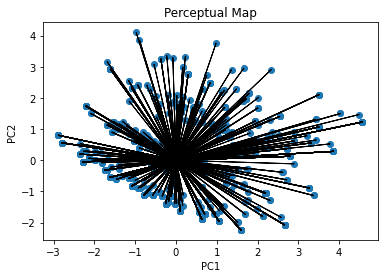

In [28]:
plt.scatter(x_pca[:, 0], x_pca[:, 1])
for i in range(df_pca.shape[0]):
    plt.arrow(0, 0, x_pca[i, 0], x_pca[i, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Perceptual Map")
plt.show()

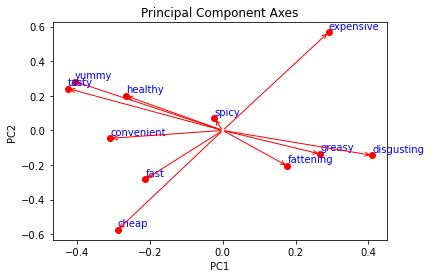

In [29]:
scale = 1
for i,j in enumerate(df_pca.columns):
    plt.text(
        pca.components_[0, :][i]*scale, 
        (pca.components_[1, :][i]+0.02)*scale, 
        j, color='blue'
    )
    plt.annotate(
        '', xytext=(0, 0), 
        xy=(pca.components_[0, :][i]*scale, 
        pca.components_[1, :][i]*scale), 
        arrowprops=dict(
            arrowstyle="->", 
            color='red'
        )
    )
plt.scatter(
    pca.components_[0, :]*scale, 
    pca.components_[1, :]*scale, 
    color='red'
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')
plt.show()

# Step 5: Extracting Segments

# 5.1 Using Kmeans

In [30]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [31]:
k_range = range(2, 9)
n_reps = 10
cluster_results = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=n_reps)
    kmeans.fit(x_pca)
    cluster_results.append(kmeans)

In [32]:
relabeled_results = [np.array(cluster.labels_) for cluster in cluster_results]

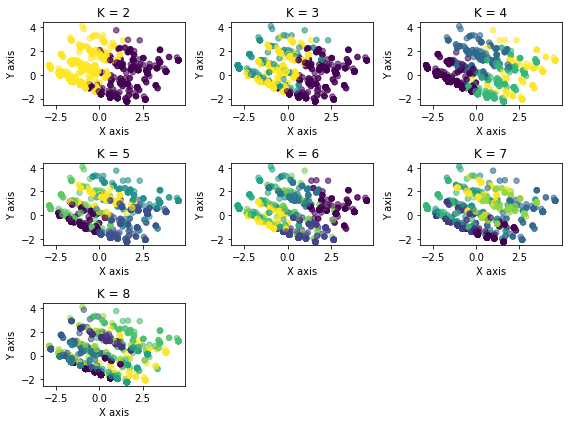

In [33]:
plt.figure(figsize=(8, 6))
for i, labels in enumerate(relabeled_results):
    plt.subplot(3, 3, i + 1)
    plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
    plt.title(f"K = {i + 2}")
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
plt.tight_layout()
plt.show()

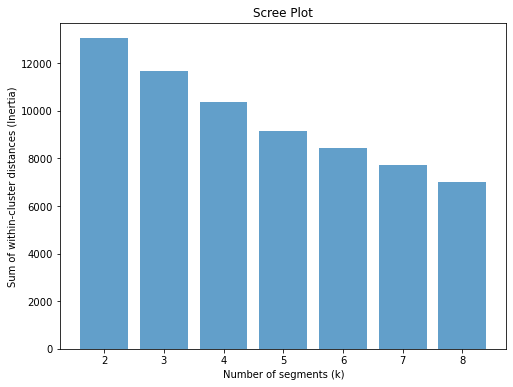

In [34]:
k_range = range(2, 9)
inertia_values = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca)
    inertia_values.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.bar(k_range, inertia_values, align='center', alpha=0.7)
plt.xlabel('Number of segments (k)')
plt.ylabel('Sum of within-cluster distances (Inertia)')
plt.title('Scree Plot')
plt.show()

In [35]:
from sklearn.metrics import adjusted_rand_score

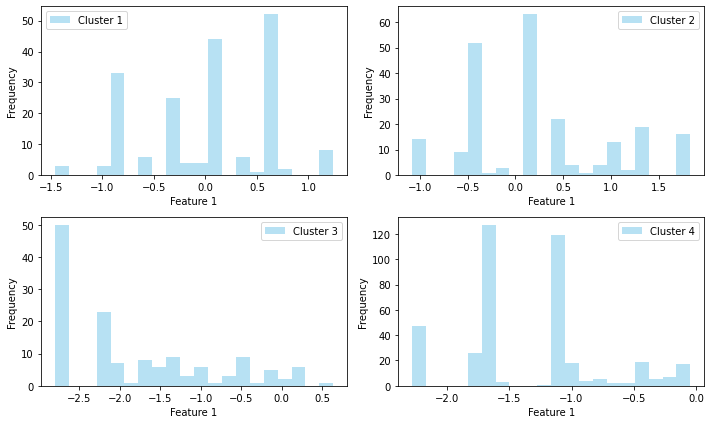

In [36]:
cluster_data = {}
for i in range(4):
    cluster_data[i + 1] = x_pca[labels == i]

# Plotting histograms for each cluster
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.hist(cluster_data[i + 1][:, 0], bins=20, alpha=0.6, label=f'Cluster {i + 1}', color='skyblue')
    plt.xlabel('Feature 1')
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()


In [37]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\omkap\AppData\Roaming\Python\Python39\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\omkap\AppData\Roaming\Python\Python39\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


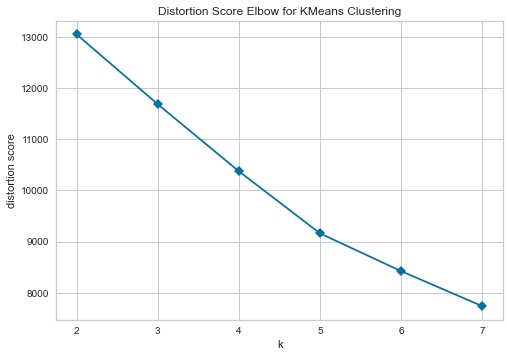

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
visualizer = KElbowVisualizer(kmeans, k=(2, 8), timings=False)

# Fit the visualizer to the data
visualizer.fit(x_pca)

# Finalize and render the plot
visualizer.show()

# 5.2 Using Mixtures of Distributions

In [39]:
from sklearn.mixture import GaussianMixture

C:\Users\omkap\AppData\Local\Temp\ipykernel_17260\991704910.py:14: RuntimeWarning: overflow encountered in exp
  likelihood = np.exp(model.score_samples(x_pca).sum())
C:\Users\omkap\AppData\Local\Temp\ipykernel_17260\991704910.py:14: RuntimeWarning: overflow encountered in exp
  likelihood = np.exp(model.score_samples(x_pca).sum())
C:\Users\omkap\AppData\Local\Temp\ipykernel_17260\991704910.py:14: RuntimeWarning: overflow encountered in exp
  likelihood = np.exp(model.score_samples(x_pca).sum())
C:\Users\omkap\AppData\Local\Temp\ipykernel_17260\991704910.py:14: RuntimeWarning: overflow encountered in exp
  likelihood = np.exp(model.score_samples(x_pca).sum())
C:\Users\omkap\AppData\Local\Temp\ipykernel_17260\991704910.py:14: RuntimeWarning: overflow encountered in exp
  likelihood = np.exp(model.score_samples(x_pca).sum())
C:\Users\omkap\AppData\Local\Temp\ipykernel_17260\991704910.py:14: RuntimeWarning: overflow encountered in exp
  likelihood = np.exp(model.score_samples(x_pca).sum()

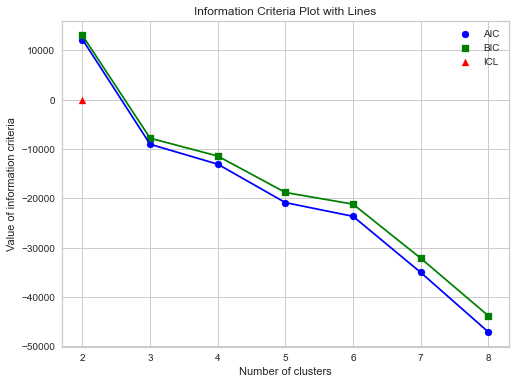

In [40]:
models = []

# Fit models for different numbers of clusters (2 to 8)
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(x_pca)
    models.append(gmm)

# Calculate and display information criteria (AIC, BIC, ICL)
aic_values = []
bic_values = []
icl_values = []
for k, model in enumerate(models):
    likelihood = np.exp(model.score_samples(x_pca).sum())
    n_params = k * (x_pca.shape[1] * 2 + 1)  # Number of parameters for a GMM
    n_samples = x_pca.shape[0]
    icl = likelihood - 0.5 * n_params * np.log(n_samples)
    
    aic_values.append(model.aic(x_pca))
    bic_values.append(model.bic(x_pca))
    icl_values.append(icl)

# Plotting information criteria with connecting lines
plt.figure(figsize=(8, 6))

# Scatter plots for AIC, BIC, and ICL
plt.scatter(range(2, 9), aic_values, marker='o', color='blue', label='AIC')
plt.scatter(range(2, 9), bic_values, marker='s', color='green', label='BIC')
plt.scatter(range(2, 9), icl_values, marker='^', color='red', label='ICL')

# Lines connecting AIC, BIC, and ICL points
plt.plot(range(2, 9), aic_values, linestyle='-', color='blue')
plt.plot(range(2, 9), bic_values, linestyle='-', color='green')
plt.plot(range(2, 9), icl_values, linestyle='-', color='red')

plt.xlabel('Number of clusters')
plt.ylabel('Value of information criteria')
plt.title('Information Criteria Plot with Lines')
plt.legend()
plt.grid(True)
plt.show()


# 5.3 Using Mixtures of Regression Models

# Step 6: Profiling Segments

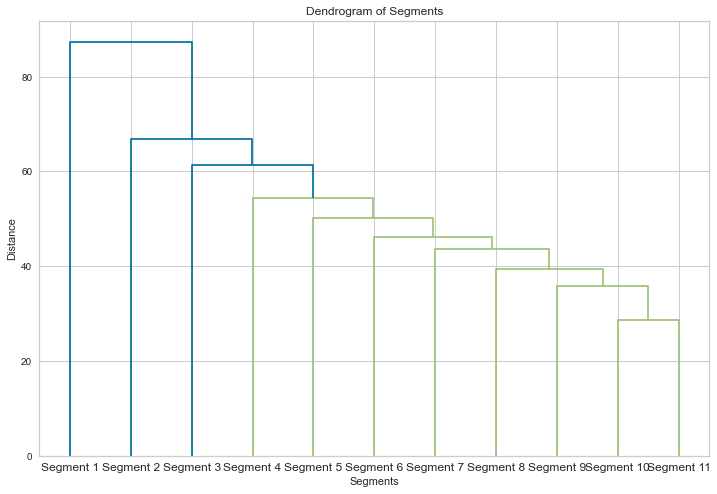

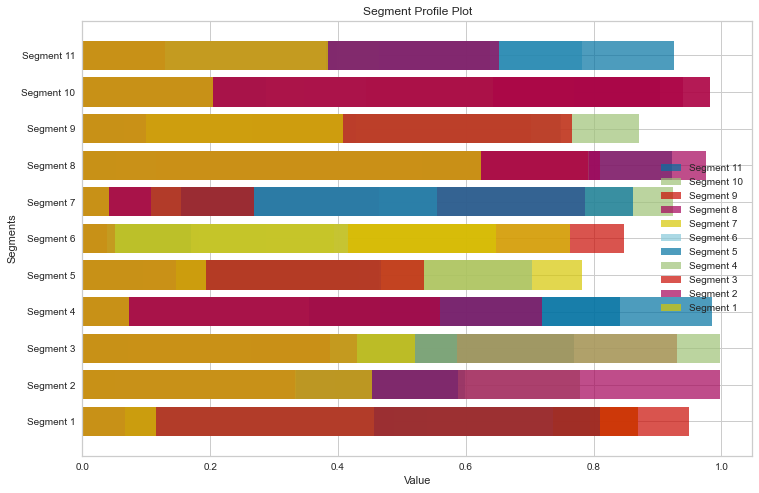

In [41]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import make_blobs

# Performing hierarchical clustering
distance_matrix = np.transpose(x_pca)
Z = linkage(distance_matrix, method='ward')

# Example segment labels (replace with actual segment labels if available)
segment_labels = [f"Segment {i+1}" for i in range(x_pca.shape[1])]

# Visualizing the dendrogram (if desired)
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=segment_labels)
plt.title('Dendrogram of Segments')
plt.xlabel('Segments')
plt.ylabel('Distance')
plt.show()

# Assuming MD.k4 contains the segment profiles (replace with actual data)
# Plotting the bar chart for a specific number of clusters (k = 4 in this case)
plt.figure(figsize=(12, 8))
segment_profiles = np.random.rand(11, x_pca.shape[1])  # Replace with your segment profiles

# Order segments based on hierarchical clustering
order = dendrogram(Z, no_plot=True)['leaves']

# Plotting the bar chart based on the ordered segments
for i in order[::-1]:
    plt.barh(range(len(segment_profiles)), segment_profiles[:, i], align='center', alpha=0.7, label=f"Segment {i+1}")
plt.xlabel('Value')
plt.ylabel('Segments')
plt.title('Segment Profile Plot')
plt.yticks(range(len(segment_profiles)), [f"Segment {i+1}" for i in range(x_pca.shape[1])])
plt.legend()
plt.show()


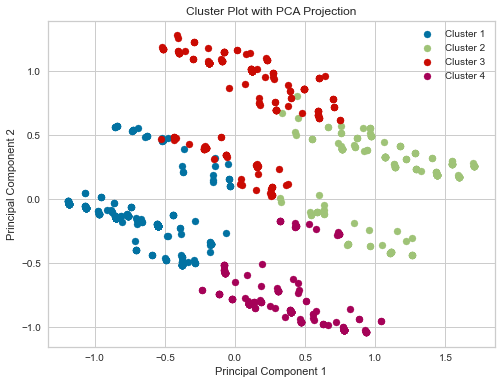

In [42]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(df_pca)

# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_pca)

# Assuming MD.pca contains PCA results (replace with actual PCA results)
# Plotting the clusters with PCA projection
plt.figure(figsize=(8, 6))

for i in range(4):  # Change 4 to the actual number of clusters
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], label=f'Cluster {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Plot with PCA Projection')
plt.legend()
plt.grid(True)
plt.show()


# Step 7: Describing Segments

In [43]:
from statsmodels.graphics.mosaicplot import mosaic

In [44]:
df['segments'] = cluster_labels

In [45]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,2
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,3


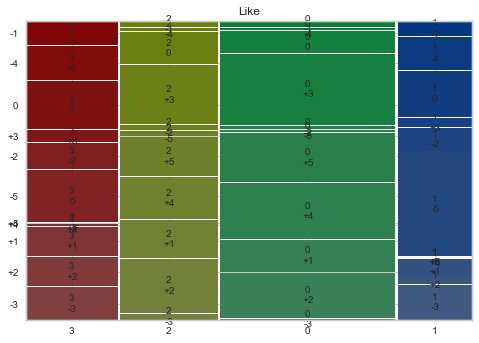

In [46]:
mosaic(df, ['segments', 'Like'], title='Like');
plt.show()

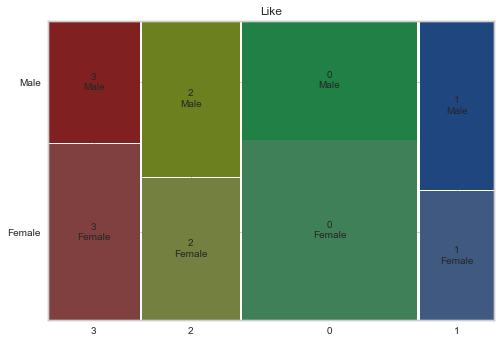

In [47]:
mosaic(df, ['segments', 'Gender'], title='Like');
plt.show()

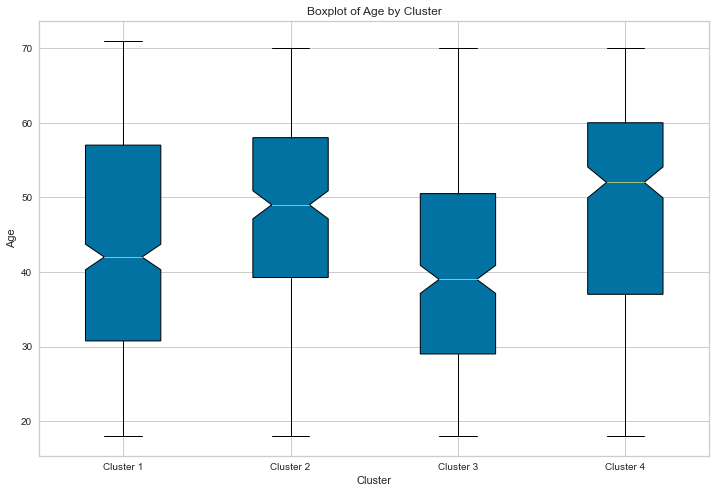

In [48]:
plt.figure(figsize=(12, 8))
plt.boxplot([df['Age'][cluster_labels == i] for i in range(4)], 
            labels=[f'Cluster {i+1}' for i in range(4)],
            patch_artist=True, notch=True)

plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Boxplot of Age by Cluster')
plt.grid(True)
plt.show()

# Step 8: Selecting (the) Target Segment(s)

In [49]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,2
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,3


In [50]:
df['Like'].unique()

array(['-3', '+2', '+1', '+4', '+5', '-5', '-2', '+3', '0', '-4', '-1'],
      dtype=object)

In [51]:
df['Like'] = df['Like'].str.extract(r'([-\d]+)').astype(int)

In [52]:
df['VisitFrequency'].unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [60]:
df['VisitFrequency'] = df['VisitFrequency'].replace({
    'Every three months':4/5, 
    'Once a week':52/5, 
    'Once a month':12/5, 
    'Once a year':1/5,
    'More than once a week':104/5, 
    'Never':0
})

In [54]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,3
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female,2
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female,2
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male,3


In [61]:
visit_means = (df.groupby("segments")["VisitFrequency"]
               .mean())

In [62]:
visit_means

segments
0    4.727241
1    1.169919
2    4.533127
3    1.483553
Name: VisitFrequency, dtype: float64

In [63]:
like_means = df.groupby("segments")["Like"].mean()

In [64]:
female_means = (df.groupby("segments")["Gender"]
                .apply(lambda x: (x == "Female")
                .mean()))

C:\Users\omkap\AppData\Local\Temp\ipykernel_17260\3457231584.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label="Female Proportion")


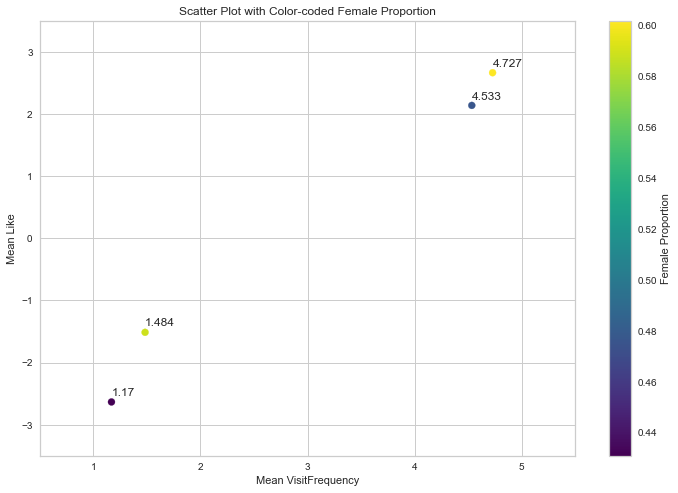

In [69]:
plt.figure(figsize=(12, 8))
plt.scatter(
    visit_means, 
    like_means, 
    c=female_means, 
    cmap="viridis",
)
plt.xlabel("Mean VisitFrequency")
plt.ylabel("Mean Like")
plt.xlim(0.5,5.5)
plt.ylim(-3.5,3.5)
plt.title("Scatter Plot with Color-coded Female Proportion")
plt.colorbar(label="Female Proportion")
for i,j,k in zip(
    visit_means, 
    like_means, 
    visit_means
):
    plt.text(i, j+0.1, round(k, 3))
plt.show()

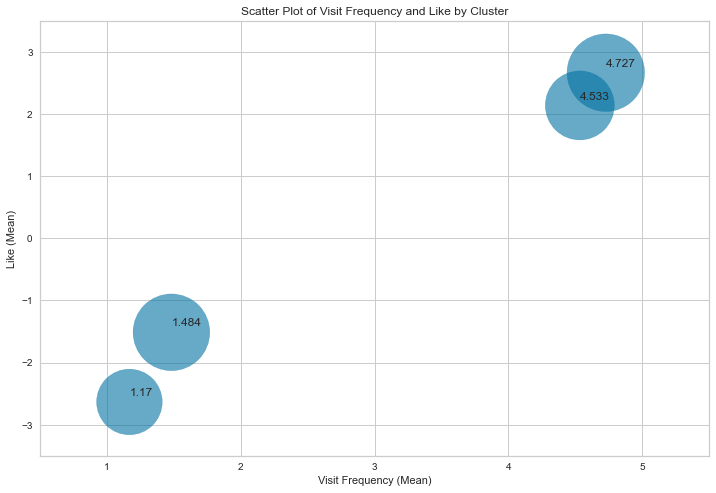

In [68]:
visit_means = (df.groupby("segments")["VisitFrequency"]
               .mean())
like_means = df.groupby("segments")["Like"].mean()
female_means = (df.groupby("segments")["Gender"]
                .apply(lambda x: (x == "Female")
                .mean()))

plt.figure(figsize=(12, 8))

plt.scatter(visit_means, like_means, s=10000*female_means, alpha=0.6)
plt.xlabel('Visit Frequency (Mean)')
plt.ylabel('Like (Mean)')
plt.xlim(0.5,5.5)
plt.ylim(-3.5,3.5)
plt.title('Scatter Plot of Visit Frequency and Like by Cluster')
for i,j,k in zip(
    visit_means, 
    like_means, 
    visit_means
):
    plt.text(i, j+0.1, round(k, 3))
plt.show()